# Ph.D. Course on "Advanced Machine Learning" August 23rd, 2024
## - Physics-Informed Machine Learning and Surrogate Modelling

This notebook is a part of exercises in the PhD Course that complement the lecture. 

To make sure your environment is setup to perform the exercises please visit

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; https://github.com/apengsigkarup

and follow the instructions for installing the environment.

If you have not already done so, please download all the data files and codes from this github repository and report any errors or issues with the materials to Allan Peter Engsig-Karup (apek@dtu.dk).

### Python modules needed

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import platform

### Detect device

In [2]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

# Check for ARM architecture
architecture = platform.machine()
if 'arm' in architecture or 'aarch' in architecture:
    print("Architecture: ARM")
else:
    print(f"Architecture: {architecture}")

# Optional: More detailed GPU check
if device == "cuda":
    print(f"CUDA version: {torch.version.cuda}")
    print(f"Number of GPUs available: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")

# Check for CPU information
cpu_info = platform.processor()
if cpu_info:
    print(f"CPU: {cpu_info}")
else:
    print("CPU information not available.")


Device: cpu
Architecture: ARM
CPU: arm


### Define Precision used in PyTorch

In [3]:
# Set default tensor type in PyTorch to float64 precision
torch.set_default_dtype(torch.float32)

### Define seed for deterministic (reproducible) calculations while testing

In [4]:
# for reproducibility, define a seed manually
seed = 28 # 21 # 13
torch.manual_seed(seed)
#random.seed(seed)
np.random.seed(seed)

## Exercise 01: Getting Started

The purpose of this notebook is gain some experiences with setting up Neural PDE methods that utilize neural networks for tasks such as
- setting up data-driven function approximation based on regression using a neural network
- computing the gradients of the neural network

### Exercise 01a: Data-driven function approximation

Epoch [500/5000], Loss: 0.0011
Epoch [1000/5000], Loss: 0.0004
Epoch [1500/5000], Loss: 0.0002
Epoch [2000/5000], Loss: 0.0001
Epoch [2500/5000], Loss: 0.0001
Epoch [3000/5000], Loss: 0.0001
Epoch [3500/5000], Loss: 0.0001
Epoch [4000/5000], Loss: 0.0000
Epoch [4500/5000], Loss: 0.0000
Epoch [5000/5000], Loss: 0.0000


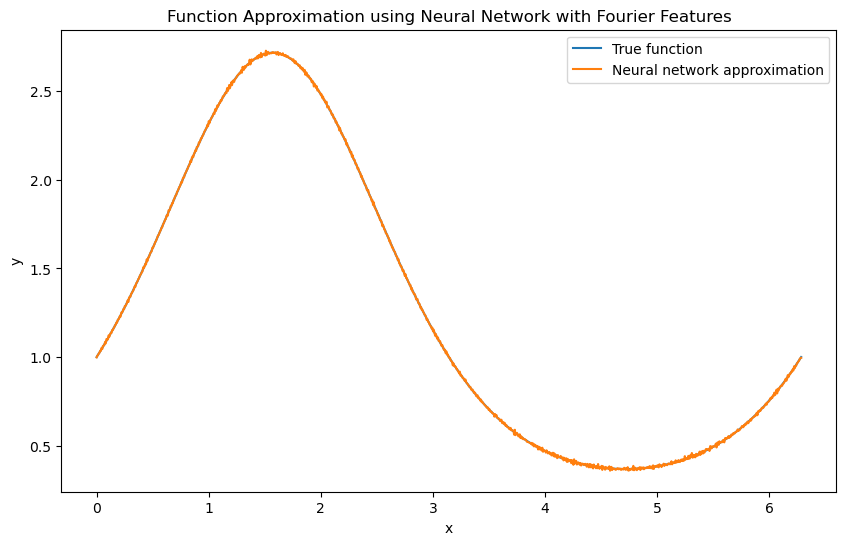

In [5]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Function to approximate
def fun(x):
    return np.exp(np.sin(x))


# Neural network with Fourier feature transformation
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

<DEFINE THIS>

    def forward(self, x):

<DEFINE THIS>

        return x

# Generate data
x_train = np.linspace(0, 2 * np.pi, 1000).reshape(-1, 1).astype(np.float32)
y_train = fun(x_train).reshape(-1, 1).astype(np.float32)

# Convert to torch tensors
x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train)

# Initialize model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = <DEFINE THIS>

# Training loop
num_epochs = 5000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(x_train).numpy()

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_train.numpy(), y_train.numpy(), label='True function')
plt.plot(x_train.numpy(), y_pred, label='Neural network approximation')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Approximation using Neural Network with Fourier Features')
plt.show()

### Exercise 01b: Compute gradients of the neural network

Epoch [500/5000], Loss: 0.0019
Epoch [1000/5000], Loss: 0.0004
Epoch [1500/5000], Loss: 0.0002
Epoch [2000/5000], Loss: 0.0001
Epoch [2500/5000], Loss: 0.0001
Epoch [3000/5000], Loss: 0.0000
Epoch [3500/5000], Loss: 0.0000
Epoch [4000/5000], Loss: 0.0001
Epoch [4500/5000], Loss: 0.0000
Epoch [5000/5000], Loss: 0.0000


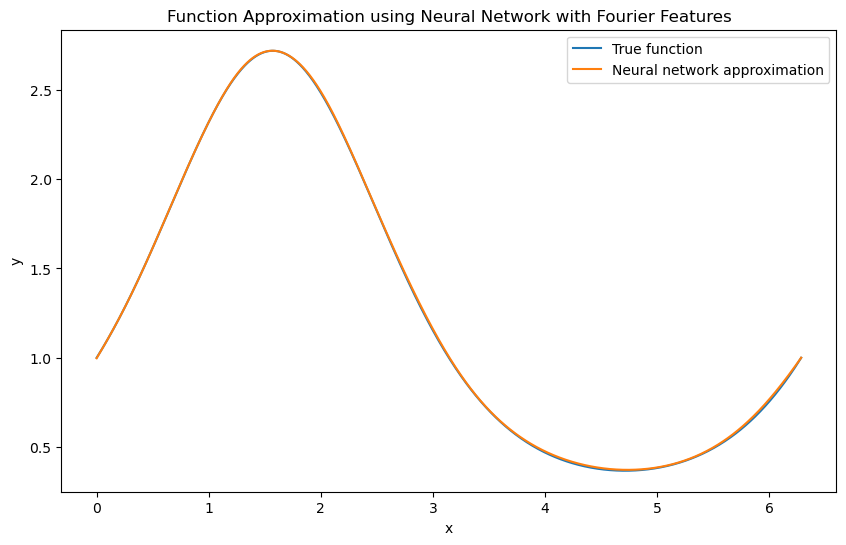

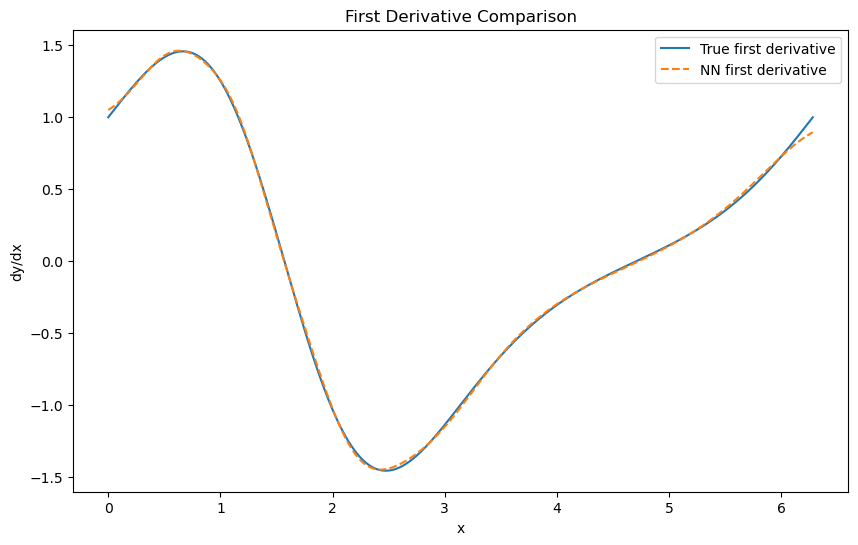

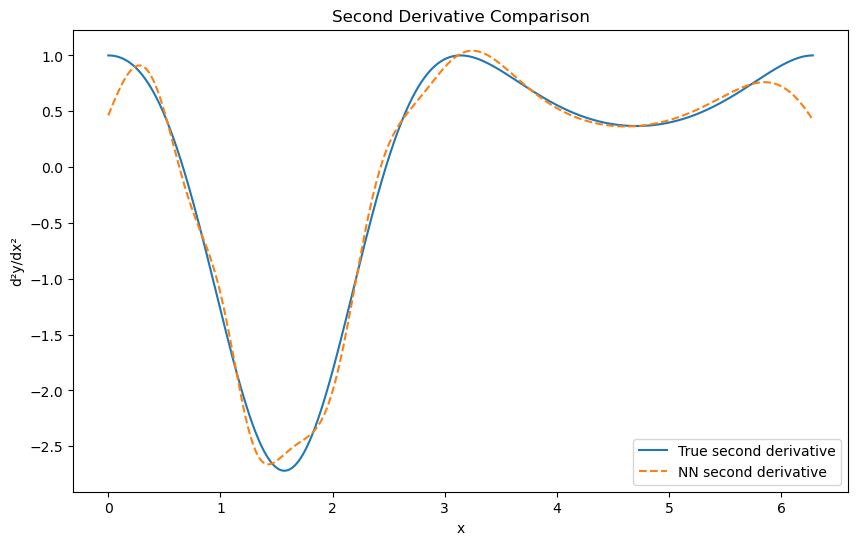

In [16]:
# Function to approximate with its first and second derivatives
def fun(x):
    f = np.exp(np.sin(x))
    df = f * np.cos(x)  # First derivative
    d2f = -f * np.sin(x) + df * np.cos(x)  # Second derivative
    return f, df, d2f

# Neural network with Fourier feature transformation
class NeuralNetwork(nn.Module):
    def __init__(self):
<DEFINE THIS>

    def forward(self, x):
<DEFINE THIS>
    return x

# Generate data
x_train = np.linspace(0, 2 * np.pi, 1000).reshape(-1, 1).astype(np.float32)
y_train, dy_train, d2y_train = fun(x_train)

# Convert to torch tensors
x_train = torch.tensor(x_train, requires_grad=True)
y_train = torch.tensor(y_train.reshape(-1, 1))
dy_train = torch.tensor(dy_train.reshape(-1, 1))
d2y_train = torch.tensor(d2y_train.reshape(-1, 1))

# Initialize model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = <DEFINE THIS>

# Training loop
num_epochs = 5000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(x_train).numpy()

# Compute gradients
def compute_gradients(model, x):
    y_pred = model(x)
    dy_pred = torch.autograd.grad(y_pred, x, grad_outputs=torch.ones_like(y_pred), create_graph=True, retain_graph=True)[0]
    d2y_pred = torch.autograd.grad(dy_pred, x, grad_outputs=torch.ones_like(dy_pred), create_graph=True, retain_graph=True)[0]
    return dy_pred, d2y_pred

dy_pred, d2y_pred = compute_gradients(model, x_train)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_train.detach().numpy(), y_train.numpy(), label='True function')
plt.plot(x_train.detach().numpy(), y_pred, label='Neural network approximation')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Approximation using Neural Network with Fourier Features')
plt.show()

# Plot first derivative
plt.figure(figsize=(10, 6))
plt.plot(x_train.detach().numpy(), dy_train.numpy(), label='True first derivative')
plt.plot(x_train.detach().numpy(), dy_pred.detach().numpy(), label='NN first derivative', linestyle='dashed')
plt.legend()
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.title('First Derivative Comparison')
plt.show()

# Plot second derivative
plt.figure(figsize=(10, 6))
plt.plot(x_train.detach().numpy(), d2y_train.numpy(), label='True second derivative')
plt.plot(x_train.detach().numpy(), d2y_pred.detach().numpy(), label='NN second derivative', linestyle='dashed')
plt.legend()
plt.xlabel('x')
plt.ylabel('d²y/dx²')
plt.title('Second Derivative Comparison')
plt.show()


See how accurate you can estimate the gradients of the function using the neural network architecture you choose. Think about implications of not being very accurate when using neural networks in the context of physics-informed learning that rely on incorporating differential equations in the cost function.